<a href="https://colab.research.google.com/github/sudip234-source/Fake-job-Discovery/blob/main/EDA_on_fake_job_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!unzip /content/drive/MyDrive/Datasets/fake-job.zip

Archive:  /content/drive/MyDrive/Datasets/fake-job.zip
  inflating: fake_job_postings.csv   


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/fake_job_postings.csv')
df.sample(3)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
3786,3787,Team Manager (Outbound Sales),"GB, GLG, Glasgow",Operations,20-25,Aquira help businesses sell more. Lots more. W...,We are growing again! As a result of new busin...,NaN,NaN,0,1,0,Full-time,Not Applicable,Unspecified,Telecommunications,Sales,0
13442,13443,Product Manager,"US, CA, San Mateo",NaN,NaN,Tile is one of the most successful crowd-funde...,"The RoleAs Tile’s first Product Manager, you w...",Experience with rapid development cyclesKnowle...,Own equity in the company. Every employee is a...,0,1,0,Full-time,Associate,Bachelor's Degree,Consumer Electronics,Management,0
7232,7233,Activities Co-Ordinator,"GB, ABD, Insch",Care Staff,NaN,Priority Care Group are a family run care grou...,You will be responsible for creating and organ...,Good communication skillsCaring natureWork wel...,Priority Rewards Scheme for all staff membersA...,0,1,1,Part-time,Not Applicable,Unspecified,Hospital & Health Care,Other,0


In [ ]:
df[df.fraudulent == 1].sample()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
17666,17667,Customer Service Representative,"US, NY, New York",Data entry,20-25,NaN,Burrell Behavioral Health is seeking qualified...,This position offers a comprehensive benefit p...,"Benefits: Health, Dental, Life and AD&amp;D In...",0,0,0,Part-time,Entry level,Unspecified,Consumer Services,Administrative,1


In [ ]:
df.shape

(17880, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

(<Axes: xlabel='fraudulent', ylabel='count'>, 0.9515659955257271)

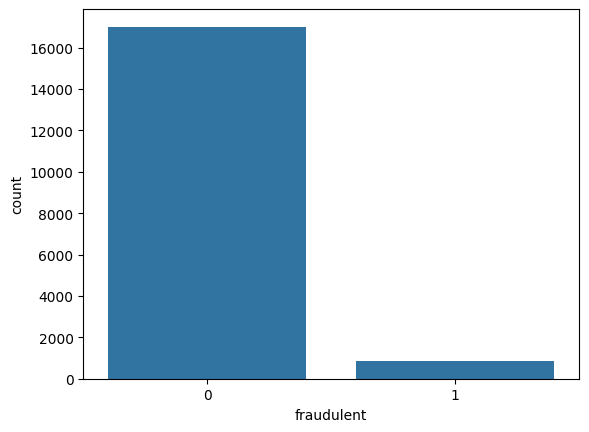

In [ ]:
sns.countplot(data=df,x='fraudulent'),df[df.fraudulent == 0].shape[0]/df.shape[0]

It is an Imbalanced Dataset

In [ ]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
posting_US = df[df.location.fillna('unknown').str.contains('US')]

In [ ]:
len(posting_US)

10656

In [ ]:
missing_0 = df[df.fraudulent == 0].isna().sum()
missing_1 = df[df.fraudulent == 1].isna().sum()
missing_percent = (df.isna().sum()/df.shape[0])*100
missing_df = pd.DataFrame({
    'Column': df.columns,
    'Non Fradulent': missing_0.values,
    'Fradulent': missing_1.values,
    'missing percentage':missing_percent.values
    })
missing_df

,Column,Non Fradulent,Fradulent,missing percentage
0,job_id,0,0,0.000000
1,title,0,0,0.000000
2,location,327,19,1.935123
3,department,11016,531,64.580537
4,salary_range,14369,643,83.959732
5,company_profile,2721,587,18.501119
6,description,0,1,0.005593
7,requirements,2542,154,15.078300
8,benefits,6848,364,40.335570
9,telecommuting,0,0,0.000000


### Job Locations

In [ ]:
df.location = df.location.fillna('unknown')

In [ ]:
locs = np.concatenate(df.location.str.split(',').values)

In [ ]:
len(locs)

52925

In [ ]:
locs

array(['US', ' NY', ' New York', ..., 'NZ', ' N', ' Wellington'],
      dtype='<U96')

In [ ]:
locs = locs[locs !='']
len(locs)

52922

In [ ]:
locs = locs[locs !=' ']

In [ ]:
from collections import Counter
city_counts = Counter(locs)
cities = pd.DataFrame.from_dict(city_counts, orient='index', columns=['Count'])

# Optional: sort by count
cities = cities.sort_values(by='Count', ascending=False)


In [ ]:
cities.head(10)

,Count
US,10656
GB,2384
CA,2067
NY,1282
London,1069
LND,992
TX,975
GR,940
I,688
New York,670


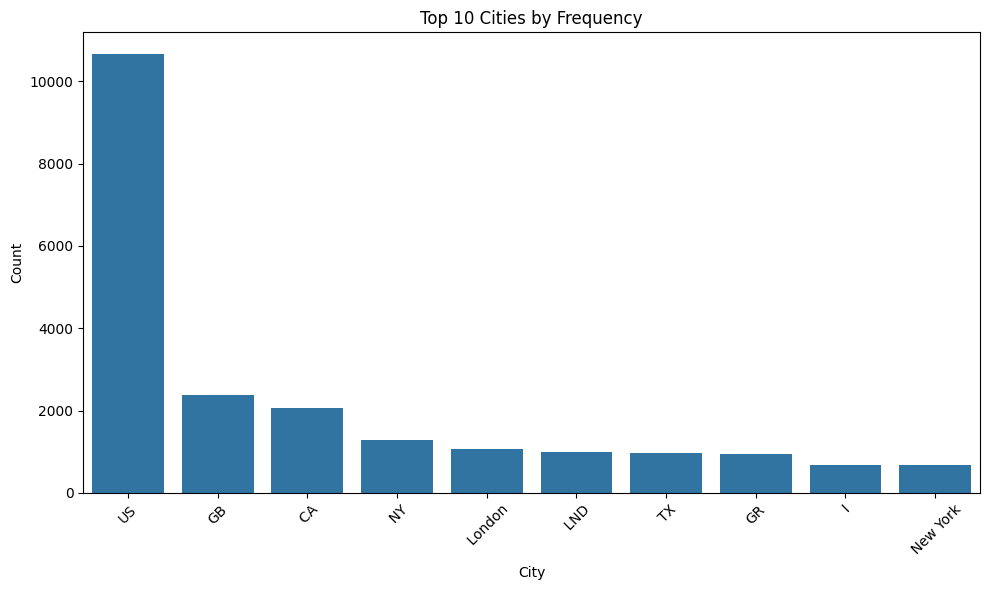

In [ ]:
plt.figure(figsize=(10,6))
city_idx = cities.reset_index().rename(columns={'index': 'City'})
sns.barplot(data=city_idx.head(10),x='City',y='Count')
plt.xticks(rotation = 45)
plt.title('Top 10 Cities by Frequency')
plt.tight_layout()
plt.show()

### Number of jobs with experience

In [ ]:
set(df.required_experience)

{'Associate',
 'Director',
 'Entry level',
 'Executive',
 'Internship',
 'Mid-Senior level',
 'Not Applicable',
 nan}

In [ ]:
experiences = df.required_experience.fillna('unknown')

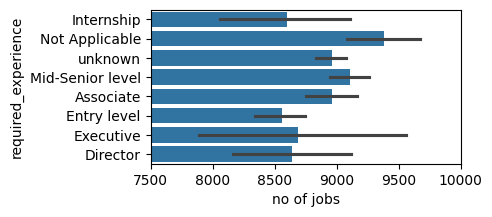

In [ ]:
plt.figure(figsize=(4,2))
sns.barplot(data = experiences)
plt.xlim(7500,10000)
plt.xlabel('no of jobs')
plt.show(
)

### Jobs Titles

In [ ]:
# Most frequent jobs
df.title.value_counts()[:50].index

Index(['English Teacher Abroad ', 'Customer Service Associate ',
       'Graduates: English Teacher Abroad (Conversational)',
       'English Teacher Abroad', 'Software Engineer',
       'English Teacher Abroad (Conversational)',
       'Customer Service Associate - Part Time ', 'Account Manager',
       'Web Developer', 'Project Manager',
       'Beauty & Fragrance consultants needed',
       'Graduates: English Teacher Abroad ', 'Customer Service Representative',
       'Administrative Assistant', 'Product Manager', 'Office Manager',
       'Sales Representative', 'Marketing Manager',
       'Customer Service Associate', 'Web Designer', 'iOS Developer',
       'Senior Software Engineer', 'Account Executive',
       'Customer Service Team Lead ', 'Front End Developer', 'Sales Manager',
       'Software Developer', 'Android Developer', 'Data Scientist',
       'Contact Center Representatives', 'Business Analyst', 'Java Developer',
       'PHP Developer', 'Entry Level Sales',
       'Cu

In [ ]:
#Most frequent jobs with department with fraudulence
df[df.fraudulent==1][['title','department']].value_counts()[:15]

,,count
title,department,
Home Based Payroll Typist/Data Entry Clerks Positions Available,Clerical,21
Customer Service Representative,Customer Service,8
Payroll Clerk,Accounting/Payroll,6
Payroll Data Entry Clerk Position - Earn $100-$200 Daily,Clerical,6
Call Center Representative,Sales,3
Administrative Assistant,Administrative,3
Director of Technical Operations,Engineering,3
Sales Representative,Sales,3
Director of Software Engineering,Engineering,2


### Industries

In [ ]:
set(df.industry)

{'Accounting',
 'Airlines/Aviation',
 'Alternative Dispute Resolution',
 'Animation',
 'Apparel & Fashion',
 'Architecture & Planning',
 'Automotive',
 'Aviation & Aerospace',
 'Banking',
 'Biotechnology',
 'Broadcast Media',
 'Building Materials',
 'Business Supplies and Equipment',
 'Capital Markets',
 'Chemicals',
 'Civic & Social Organization',
 'Civil Engineering',
 'Commercial Real Estate',
 'Computer & Network Security',
 'Computer Games',
 'Computer Hardware',
 'Computer Networking',
 'Computer Software',
 'Construction',
 'Consumer Electronics',
 'Consumer Goods',
 'Consumer Services',
 'Cosmetics',
 'Defense & Space',
 'Design',
 'E-Learning',
 'Education Management',
 'Electrical/Electronic Manufacturing',
 'Entertainment',
 'Environmental Services',
 'Events Services',
 'Executive Office',
 'Facilities Services',
 'Farming',
 'Financial Services',
 'Fishery',
 'Food & Beverages',
 'Food Production',
 'Fund-Raising',
 'Furniture',
 'Gambling & Casinos',
 'Government Administ

<Axes: ylabel='industry'>

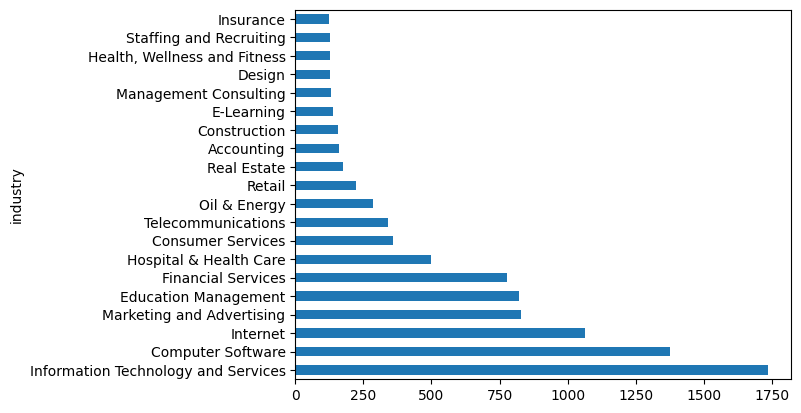

In [ ]:
df.industry.value_counts()[:20].plot(kind = 'barh')

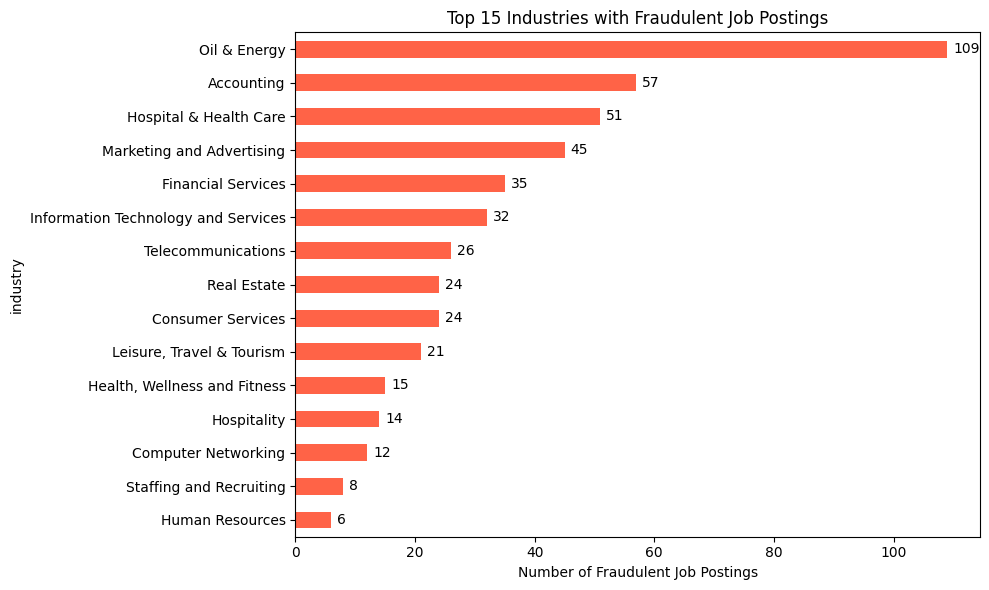

In [ ]:
#Most frequent industry with fraudulence
import matplotlib.pyplot as plt

# Get the top 15 fraudulent industries
fraud_industries = df[df.fraudulent == 1]['industry'].value_counts().head(15)

# Create horizontal bar plot
ax = fraud_industries.plot(kind='barh', figsize=(10, 6), color='tomato')

# Annotate the bars with count labels
for i, (industry, count) in enumerate(fraud_industries.items()):
    ax.text(count + 1, i, str(count), va='center')  # `+1` offsets the text a bit to the right

# Aesthetics
plt.xlabel('Number of Fraudulent Job Postings')
plt.title('Top 15 Industries with Fraudulent Job Postings')
plt.gca().invert_yaxis()  # Highest value at the top
plt.tight_layout()
plt.show()


### Fraudulence Dependency on job Description length

In [ ]:
# Text lengths
df['desc_length'] = df['description'].astype(str).apply(len)
df['title_length'] = df['title'].astype(str).apply(len)
df['req_length'] = df['requirements'].astype(str).apply(len)
df['benefits_length'] = df['benefits'].astype(str).apply(len)
df['company_profile_length'] = df['company_profile'].astype(str).apply(len)

In [ ]:
num_cols = ['desc_length', 'req_length', 'benefits_length',
            'company_profile_length', 'title_length']

In [ ]:
df[['description','title','requirements','benefits','company_profile']].sample(5)

,description,title,requirements,benefits,company_profile
4228,You will interface with both customers and our...,Principal Product Applications Engineer ( MACs...,Job Role : Principal Product Applications Engi...,Base Salary : Best in IndustryBenefits : Full,Roland &amp; Associates is a Corporate Recruit...
13520,"TransferWise, co-founded by Skype’s first empl...",Community Ambassador UK (Remote),"Are you a dynamic, motivated, outgoing network...",NaN,Want to build a 21st century financial service...
2736,Wello is expanding our network of health &amp;...,Independent Contractor Fitness Professional,NaN,NaN,NaN
12810,Experienced Electrical Supplier Quality Engine...,Mechanical Supplier Quality Engineer - ASQ NDT...,Degreed Mechanical Engineer with 10+ years’ ex...,NaN,We Provide Full Time Permanent Positions for m...
11807,Squiz is not your garden variety digital agenc...,Senior Digital Designer,NaN,NaN,Squiz is one of the world's leading web soluti...


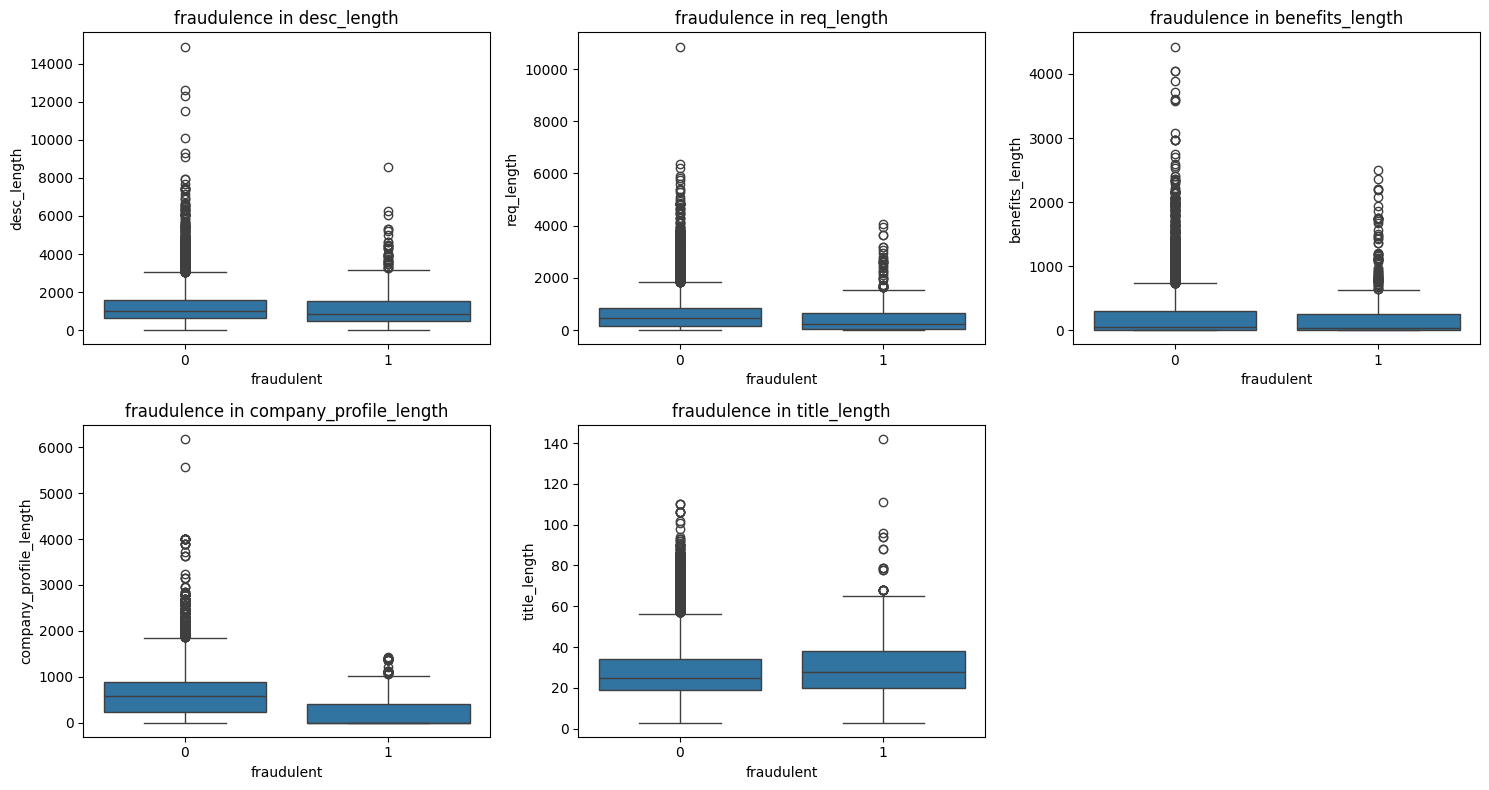

In [ ]:
plt.figure(figsize=(15,8))
for i,cols in enumerate(num_cols):
  plt.subplot(2,3,i+1)
  sns.boxplot(data = df,x='fraudulent',y=cols)
  plt.title(f"fraudulence in {cols}")
plt.tight_layout()
plt.show()

**1.Jobs Descriptions** are typically shorter, showing that fraudulent job descrioptions are less informative and more surface level

**2.Requirements** in fake job advertising are sometimes less detailed or nonexistent.

**3.Benefits** could not differ all that much from two of the classes.

**4.Company profile** One of the most noticeable distinctions. *The firm profile is lengthy and detailed in actual job postings.* Fake job postings are frequently blank, extremely brief, or incomplete.

**5.title_length:** Although the difference is not very visible, fake job postings may have somewhat longer headlines than genuine ones, which could suggest that misleading wording was used to get attention.

### Heatmap

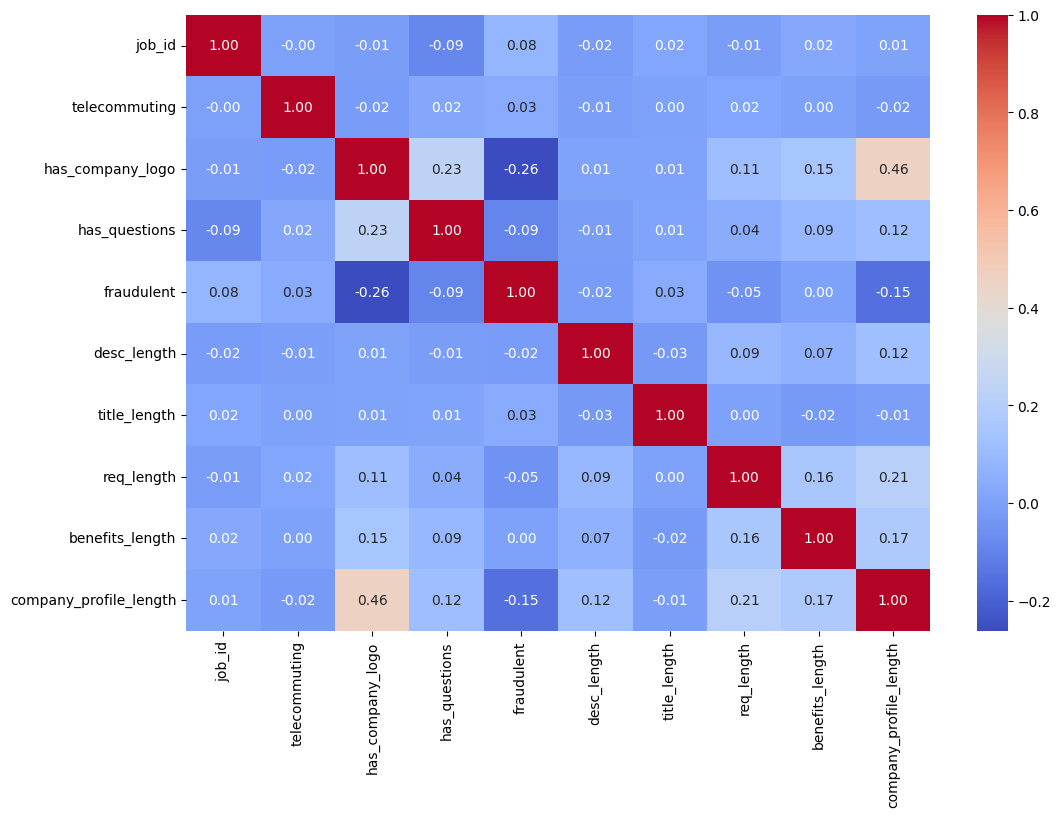

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True),annot=True,fmt=".2f",cmap='coolwarm')
plt.show()

We find that features such as has_company_logo, company_profile_length, and desc_length have a negative correlation with fraudulent, suggesting that fraudulent job listings typically have shorter company profiles, fewer company logos, and shorter descriptions.

Also there is a linear relationship b/w profile-length and having company-logo.